In [64]:
using JLD2
using Plots
using Statistics
using Printf


In [65]:
file_00 = joinpath(@__DIR__, "EPS_Schmidt_data_0.0.jld2")
file_002 = joinpath(@__DIR__, "EPS_Schmidt_data_0.002.jld2")
file_0002 = joinpath(@__DIR__, "EPS_Schmidt_data_0.0002.jld2")
file_00002 = joinpath(@__DIR__, "EPS_Schmidt_data_0.00002.jld2")



d00 = JLD2.load(file_00)
d002 = JLD2.load(file_002)
d0002 = JLD2.load(file_0002)
d00002 = JLD2.load(file_00002)


results_00 = d00["entanglement_spectrum_results"]
results_002 = d002["entanglement_spectrum_results"]
results_0002 = d0002["entanglement_spectrum_results"]
results_00002 = d00002["entanglement_spectrum_results"]


all_datasets = [
    ("0.002", results_002),
    ("0.0002", results_0002),
    ("0.00002", results_00002),
    ("0.0", results_00)
]


4-element Vector{Tuple{String, Dict{Int64, Vector{Float64}}}}:
 ("0.002", Dict(16 => [0.6170338211999208, 0.4936267862117073, 0.4936267862117032, 0.2468129814763293, 0.2468129814763241, 0.07051779344837228, 0.07051779344836973, 0.008814687583795904, 0.008814687583795324, 0.0002109611196984095  …  2.5376380383421943e-9, 2.5027415200246063e-9, 2.1247092622812986e-9, 1.6416813644071198e-9, 1.276553267571585e-9, 1.2319972711480724e-9, 7.93806519831845e-10, 7.749690428541699e-10, 3.992520671056915e-10, 3.8280746849620575e-10], 20 => [0.5862755031037564, 0.48856245836073364, 0.4885624583607296, 0.2791777578675202, 0.27917775786751475, 0.10469116601235226, 0.10469116601234862, 0.023264550315583197, 0.023264550315580494, 0.0023264353619004596  …  7.403877568179258e-10, 6.924705168569353e-10, 4.902290311479551e-10, 4.6254573362296203e-10, 2.602638991088258e-10, 2.5010832298265503e-10, 2.481312324995247e-10, 2.36329332514273e-10, 2.2568814089405582e-10, 2.1954946930828738e-10], 12 => [0.65795805

In [66]:
"""
Plots the Schmidt coefficient tails for a subset of N values on a 2x4 grid.
Compares two datasets.
Arguments:
  - results_1, results_2: The data dictionaries
  - N_subset: Array of system sizes to plot
  - label1, label2: Strings describing the datasets (used for Legend and Title)
"""
function plot_tail_comparison(results_1::Dict, results_2::Dict; 
                              N_subset=[10, 20, 30, 40, 50, 60, 70, 80],
                              label1="Dataset 1", 
                              label2="Dataset 2")
    
    # Dynamically create the title based on the provided labels
    dynamic_title = "Schmidt Tails: $label1 vs $label2 (Log Scale)"

    # Initialize 2x4 grid
    p = plot(
        layout = (2, 4),
        size = (1200, 600),
        plot_title = dynamic_title, 
        plot_titlefontsize = 16,
        legend = :topright,
        margin = 5Plots.mm
    )

    for (i, N) in enumerate(N_subset)
        if i > 8 break end 
        
        # Sort descending
        v1 = haskey(results_1, N) ? sort(results_1[N], rev=true) : nothing
        v2 = haskey(results_2, N) ? sort(results_2[N], rev=true) : nothing

        # Only add legend labels to the very first subplot (i=1)
        l1 = (i == 1) ? label1 : ""
        l2 = (i == 1) ? label2 : ""

        # Plot Dataset 2 (Noisy/Comparison)
        if v2 !== nothing
            mask = v2 .> 0 
            y = v2[mask]
            x = (1:length(v2))[mask]
            
            plot!(p, subplot=i, x, y, 
                seriestype=:scatter, markershape=:circle, markersize=3, 
                markerstrokewidth=0, color=:darkorange, alpha=0.8, label=l2)
            plot!(p, subplot=i, x, y, 
                seriestype=:path, color=:darkorange, alpha=0.5, label="")
        end

        # Plot Dataset 1 (Clean/Reference)
        if v1 !== nothing
            mask = v1 .> 0
            y = v1[mask]
            x = (1:length(v1))[mask]
            
            plot!(p, subplot=i, x, y, 
                seriestype=:scatter, markershape=:rect, markersize=3, 
                markerstrokewidth=0, color=:purple, alpha=0.4, label=l1)
            plot!(p, subplot=i, x, y, 
                seriestype=:path, color=:purple, alpha=0.5, label="")
        end

        plot!(p, subplot=i,
            title = "N = $N",
            xlabel = "Index",
            # Only show Y-axis label for the leftmost plots (1 and 5)
            ylabel = (i % 4 == 1 ? "Coeffs (log)" : ""),
            yaxis = :log10,
            framestyle = :box
        )
    end

    return p
end


plot_tail_comparison

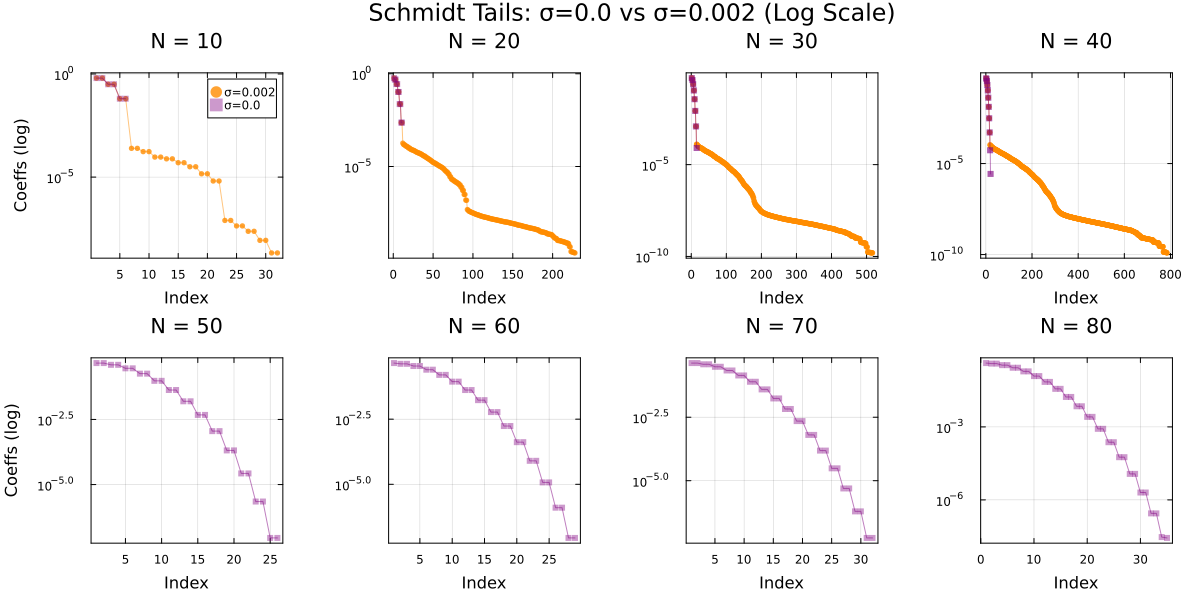

"c:\\Users\\Ethan\\OneDrive - University of Bristol\\Labs\\Y4 Labs\\A_Ethan_code\\A_EPS_tail\\tail_spectrum_0.002.png"

In [67]:

grid_Ns = [10, 20, 30, 40, 50, 60, 70, 80]
p_grid_002 = plot_tail_comparison(results_00, results_002, 
                                  N_subset=grid_Ns, 
                                  label1="σ=0.0", 
                                  label2="σ=0.002")
display(p_grid_002)
savefig(p_grid_002, joinpath(@__DIR__,"tail_spectrum_0.002.png"))


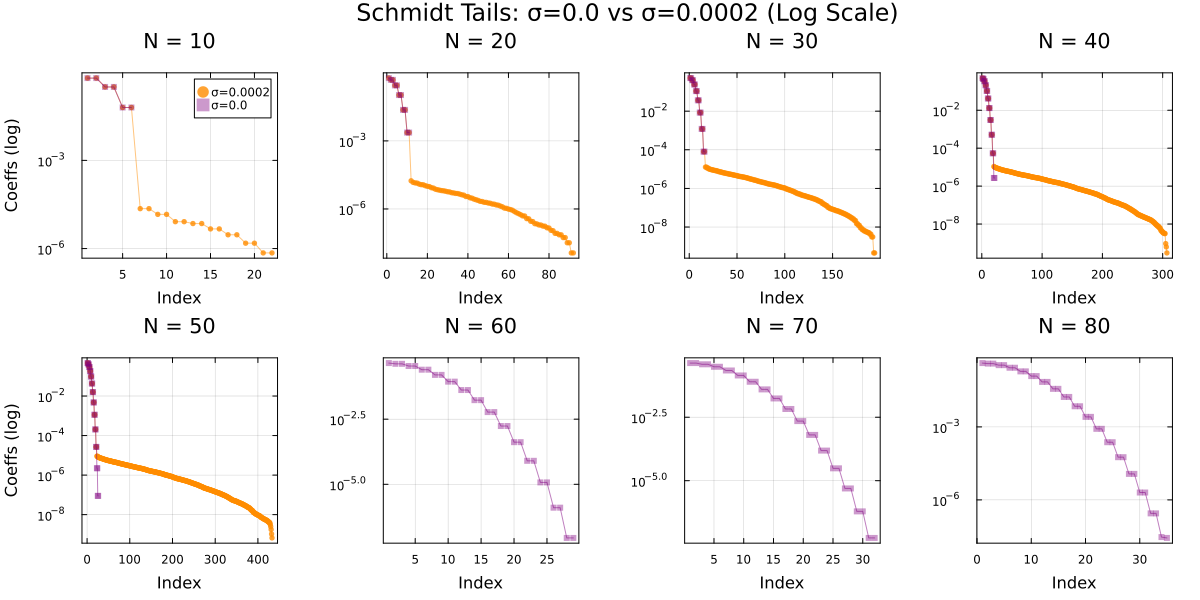

"c:\\Users\\Ethan\\OneDrive - University of Bristol\\Labs\\Y4 Labs\\A_Ethan_code\\A_EPS_tail\\tail_spectrum_0.0002.png"

In [68]:

p_grid_0002 = plot_tail_comparison(results_00, results_0002, 
                                   N_subset=grid_Ns, 
                                   label1="σ=0.0", 
                                   label2="σ=0.0002")
display(p_grid_0002)
savefig(p_grid_0002, joinpath(@__DIR__,"tail_spectrum_0.0002.png"))



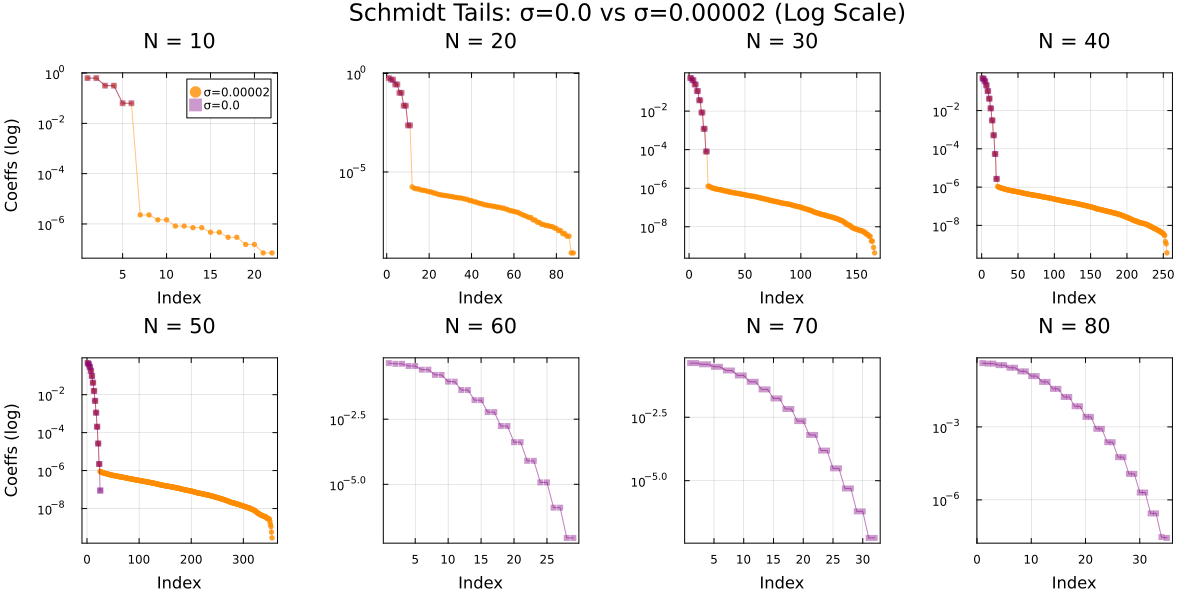

"c:\\Users\\Ethan\\OneDrive - University of Bristol\\Labs\\Y4 Labs\\A_Ethan_code\\A_EPS_tail\\tail_spectrum_0.00002.png"

In [69]:

p_grid_00002 = plot_tail_comparison(results_00, results_00002, 
                                   N_subset=grid_Ns, 
                                   label1="σ=0.0", 
                                   label2="σ=0.00002")
display(p_grid_00002)
savefig(p_grid_00002, joinpath(@__DIR__,"tail_spectrum_0.00002.png"))


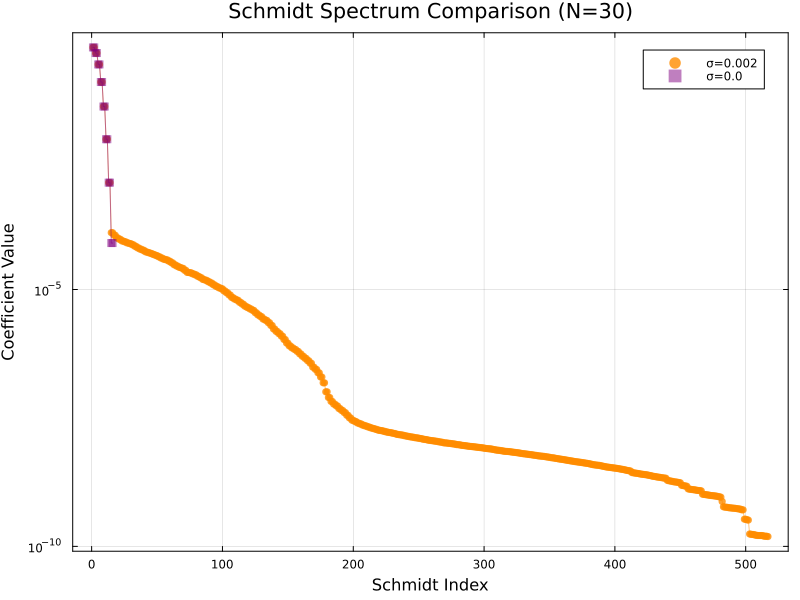

"c:\\Users\\Ethan\\OneDrive - University of Bristol\\Labs\\Y4 Labs\\A_Ethan_code\\A_EPS_tail\\tail_spectrum_0.002_N=30.png"

In [70]:
"""
Plots both spectra on the same plot for a single system size N.
"""
function plot_single_N_comparison(results_1::Dict, results_2::Dict, N::Int; 
                                  label1="σ=0.0", label2="σ=0.002")
    
    # Error check
    if !haskey(results_1, N) && !haskey(results_2, N)
        error("N=$N found in neither results dictionary.")
    end

    p = plot(
        title = "Schmidt Spectrum Comparison (N=$N)",
        xlabel = "Schmidt Index",
        ylabel = "Coefficient Value",
        yaxis = :log10,
        framestyle = :box,
        grid = true,
        legend = :topright,
        size = (800, 600)
    )

    if haskey(results_2, N)
        v2 = sort(results_2[N], rev=true)
        mask2 = v2 .> 0
        y2 = v2[mask2]
        x2 = (1:length(v2))[mask2]

        plot!(p, x2, y2, 
            seriestype=:scatter, markershape=:circle, markersize=4, 
            markerstrokewidth=0, color=:darkorange, alpha=0.8, label=label2)
        plot!(p, x2, y2, seriestype=:path, color=:darkorange, alpha=0.5, label="")
    end

    if haskey(results_1, N)
        v1 = sort(results_1[N], rev=true)
        mask1 = v1 .> 0
        y1 = v1[mask1]
        x1 = (1:length(v1))[mask1]

        plot!(p, x1, y1, 
            seriestype=:scatter, markershape=:rect, markersize=4, 
            markerstrokewidth=0, color=:purple, alpha=0.5, label=label1)
        plot!(p, x1, y1, seriestype=:path, color=:purple, alpha=0.5, label="")
    end
    
    return p
end

N_choice = 30
p_single = plot_single_N_comparison(results_00, results_002, N_choice)
display(p_single)
savefig(p_single, joinpath(@__DIR__,"tail_spectrum_0.002_N=30.png"))



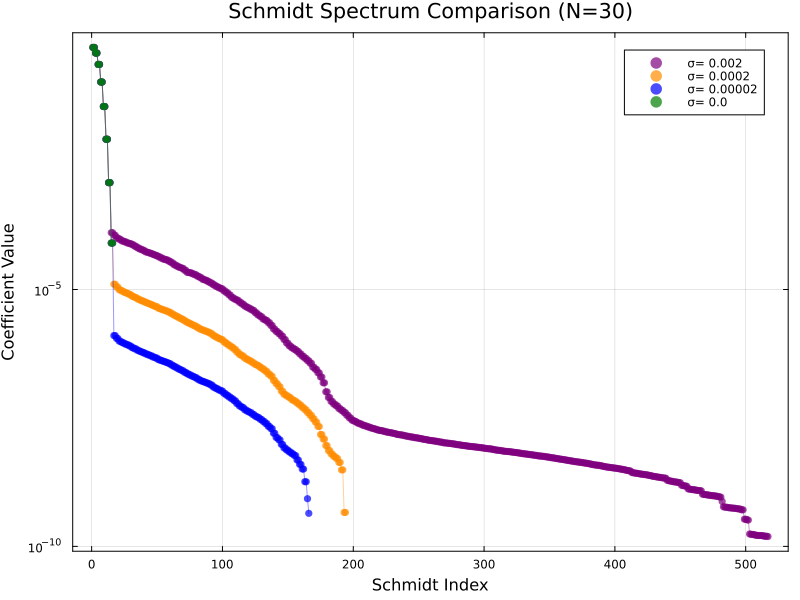

"c:\\Users\\Ethan\\OneDrive - University of Bristol\\Labs\\Y4 Labs\\A_Ethan_code\\A_EPS_tail\\tail_spectrum_N=30.png"

In [71]:
"""
Plots Schmidt spectra for multiple datasets on the same plot for a single system size N.
Args:
    datasets: A vector of tuples [("Label", DataDict), ...]
    N: The system size to verify
"""
function plot_multi_spectrum_comparison(datasets::Vector{Tuple{String, Dict{Int64, Vector{Float64}}}}, N::Int)
    
    colors = [:purple, :darkorange, :blue, :green, :red]

    p = plot(
        title = "Schmidt Spectrum Comparison (N=$N)",
        xlabel = "Schmidt Index",
        ylabel = "Coefficient Value",
        yaxis = :log10,
        framestyle = :box,
        grid = true,
        legend = :topright,
        size = (800, 600)
    )

    data_found = false

    for (i, (label_name, results_dict)) in enumerate(datasets)
        
        if haskey(results_dict, N)
            data_found = true
            
            col = colors[mod1(i, length(colors))]

            v = sort(results_dict[N], rev=true)
            mask = v .> 0
            y = v[mask]
            x = (1:length(v))[mask]

            plot!(p, x, y, 
                seriestype=:scatter, 
                markersize=4, 
                markerstrokewidth=0, 
                color=col, 
                alpha=0.7, 
                label="σ= $(label_name)"
            )
            
            plot!(p, x, y, 
                seriestype=:path, 
                color=col, 
                alpha=0.4, 
                label=""
            )
        else
            println("Warning: N=$N not found in dataset '$label_name'")
        end
    end

    if !data_found
        error("N=$N was not found in any of the provided datasets.")
    end
    
    return p
end





N_choice = 30
p_multi = plot_multi_spectrum_comparison(all_datasets, N_choice)
display(p_multi)
savefig(p_multi, joinpath(@__DIR__,"tail_spectrum_N=30.png"))


In [72]:
"""
Calculates the index where the clean (σ=0.0) and disordered Schmidt spectra deviate.
Returns a dictionary mapping N to the deviation index.

Criteria:
The deviation index is defined as the first index 'i' where the relative difference 
between the coefficients exceeds the `threshold`.
"""
function calculate_deviation_indices(results_clean::Dict, results_disordered::Dict; 
                                     threshold=0.1, N_subset=nothing)
    
    deviation_indices = Dict{Int, Int}()
    
    # Determine which N values to process
    available_Ns = intersect(keys(results_clean), keys(results_disordered))
    if N_subset !== nothing
        available_Ns = intersect(available_Ns, N_subset)
    end
    
    for N in sort(collect(available_Ns))
        # Get sorted coefficients 
        v_clean = sort(results_clean[N], rev=true)
        v_disorder = sort(results_disordered[N], rev=true)
        
        # We can only compare up to the length of the shortest vector
        min_len = min(length(v_clean), length(v_disorder))
        
        dev_idx = min_len # Default to the end if no deviation found
        
        for i in 1:min_len
            val_c = v_clean[i]
            val_d = v_disorder[i]
            
            # Avoid division by zero
            if val_c < 1e-16 || val_d < 1e-16
                # If one is zero and the other is not (significantly), that is the deviation
                if abs(val_c - val_d) > 1e-10
                    dev_idx = i
                    break
                end
                continue
            end
            
            # Relative difference metric: |c - d| / max(c, d)
            rel_diff = abs(val_c - val_d) / max(val_c, val_d)
            
            if rel_diff > threshold
                dev_idx = i
                break
            end
        end
        
        deviation_indices[N] = dev_idx
    end
    
    return deviation_indices
end


dev_indices_002 = calculate_deviation_indices(results_00, results_002, threshold=0.2)
dev_indices_0002 = calculate_deviation_indices(results_00, results_0002, threshold=0.2)
dev_indices_00002 = calculate_deviation_indices(results_00, results_00002, threshold=0.2)




Dict{Int64, Int64} with 22 entries:
  16 => 9
  20 => 11
  52 => 26
  12 => 7
  24 => 13
  28 => 15
  30 => 16
  22 => 12
  32 => 17
  36 => 19
  44 => 22
  14 => 8
  46 => 23
  40 => 21
  48 => 24
  34 => 18
  50 => 25
  10 => 6
  18 => 10
  ⋮  => ⋮

In [73]:


"""
Calculates the 'weight' (sum of squared coefficients) of the tail and the head.
- Tail: Coefficients from `index` to the end.
- Head: Coefficients from 1 to `index - 1`.
"""
function calculate_weights(results_target::Dict, indices::Dict)
    tail_weights = Dict{Int, Float64}()
    weight_diffs = Dict{Int, Float64}() # Head - Tail
    
    for (N, idx) in indices
        if !haskey(results_target, N) continue end
        
        coeffs = sort(results_target[N], rev=true)
        
        # Calculate Tail Weight: Sum(λ_i^2) for i >= idx
        if idx <= length(coeffs)
            w_tail = sum(coeffs[idx:end] .^ 2)
        else
            w_tail = 0.0
        end
        
        # Calculate Head Weight: Sum(λ_i^2) for i < idx
        if idx > 1
            w_head = sum(coeffs[1:idx-1] .^ 2)
        else
            w_head = 0.0
        end
        
        tail_weights[N] = w_tail
        weight_diffs[N] = w_head - w_tail
    end
    
    return tail_weights, weight_diffs
end



tail_w_002, w_diffs_002 = calculate_weights(results_002, dev_indices_002)
tail_w_0002, w_diffs_0002 = calculate_weights(results_0002, dev_indices_0002)
tail_w_00002, w_diffs_00002 = calculate_weights(results_0002, dev_indices_00002)


(Dict(16 => 7.770615951115014e-5, 20 => 5.415202883474455e-6, 12 => 0.0010822611959679536, 24 => 3.7228148550543026e-7, 28 => 2.7397756421548657e-8, 30 => 8.853784015107873e-9, 22 => 1.419995280438273e-6, 32 => 4.182768463969846e-9, 36 => 2.5776457794197658e-9, 44 => 2.564335788493121e-9…), Dict(16 => 0.9998445875956002, 20 => 0.999989169550511, 12 => 0.9978354775129051, 24 => 0.9999992554088558, 28 => 0.9999999451897302, 30 => 0.9999999822773638, 22 => 0.9999971599816682, 32 => 0.9999999916150704, 36 => 0.9999999948267945, 44 => 0.9999999948644269…))

In [74]:
"""
Plots the deviation indices and the weight analysis.
"""
function plot_analysis_results(deviation_indices::Dict, tail_weights::Dict, weight_diffs::Dict, disorder::String)
    



    # Sort N values for consistent plotting
    Ns = sort(collect(keys(deviation_indices)))
    
    # Prepare data arrays
    indices = [deviation_indices[N] for N in Ns]
    tails = [get(tail_weights, N, NaN) for N in Ns]
    diffs = [get(weight_diffs, N, NaN) for N in Ns]
    
    p1 = plot(Ns, indices,
        title = "Index of Deviation (σ=0 vs σ=$disorder)",
        xlabel = "System Size (N)",
        ylabel = "Schmidt Index k",
        seriestype = :scatter,
        label = "Deviation Index",
        color = :blue,
        markershape = :diamond,
        markerstrokewidth = 0,
        markersize = 6,
        grid = true,
        framestyle = :box,
        legend = :topleft
    )
    plot!(p1, Ns, indices, seriestype=:line, color=:blue, alpha=0.5, label="")

    p2 = plot(Ns, tails,
        title = "Tail Weight (Σλ² after index k)",
        xlabel = "System Size (N)",
        ylabel = "Weight",
        seriestype = :scatter,
        label = "Tail Weight",
        color = :red,
        markershape = :circle,
        markersize = 5,
        markerstrokewidth = 0,
        grid = true,
        framestyle = :box,
        legend = :topleft
    )
    plot!(p2, Ns, tails, seriestype=:line, color=:red, alpha=0.5, label="")

    p3 = plot(Ns, diffs,
        title = "Weight Diff (Head - Tail)",
        xlabel = "System Size (N)",
        ylabel = "W_head - W_tail",
        seriestype = :scatter,
        label = "Difference",
        color = :green,
        markershape = :rect,
        markersize = 5,
        markerstrokewidth = 0,
        grid = true,
        framestyle = :box,
        legend = :bottomleft
    )
    plot!(p3, Ns, diffs, seriestype=:line, color=:green, alpha=0.5, label="")

    # Combine into a layout
    l = @layout [a{0.5h}; b c]
    p_final = plot(p1, p2, p3, layout=l, size=(1000, 800), margin=5Plots.mm)
    
    return p_final
end



plot_analysis_results

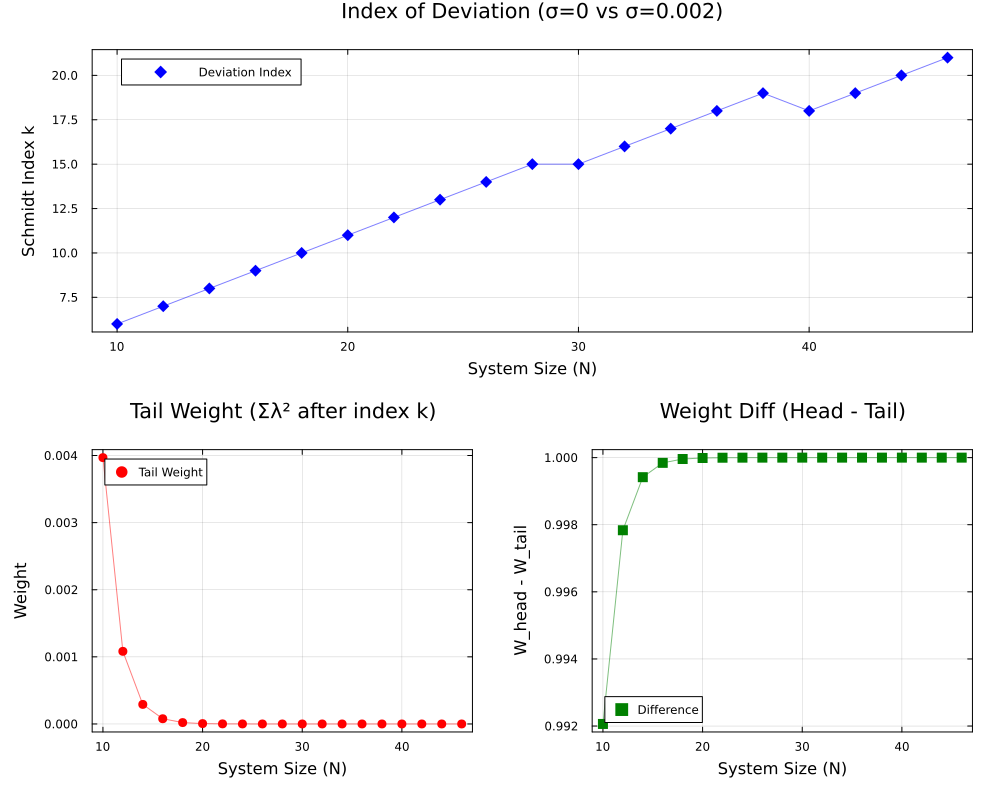

"c:\\Users\\Ethan\\OneDrive - University of Bristol\\Labs\\Y4 Labs\\A_Ethan_code\\A_EPS_tail\\deviation_index_0.002.png"

In [75]:
p_analysis = plot_analysis_results(dev_indices_002, tail_w_002, w_diffs_002, "0.002")
display(p_analysis)
savefig(p_analysis, joinpath(@__DIR__,"deviation_index_0.002.png"))


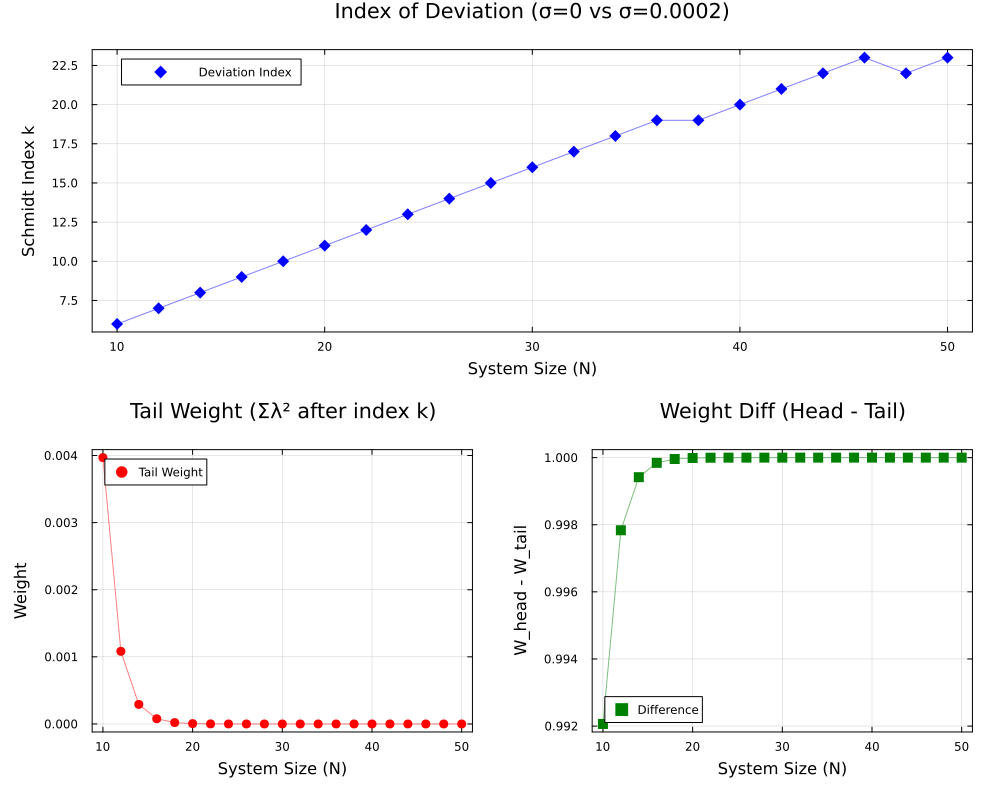

"c:\\Users\\Ethan\\OneDrive - University of Bristol\\Labs\\Y4 Labs\\A_Ethan_code\\A_EPS_tail\\deviation_index_0.0002.png"

In [76]:
p_analysis = plot_analysis_results(dev_indices_0002, tail_w_0002, w_diffs_0002, "0.0002")
display(p_analysis)
savefig(p_analysis, joinpath(@__DIR__,"deviation_index_0.0002.png"))


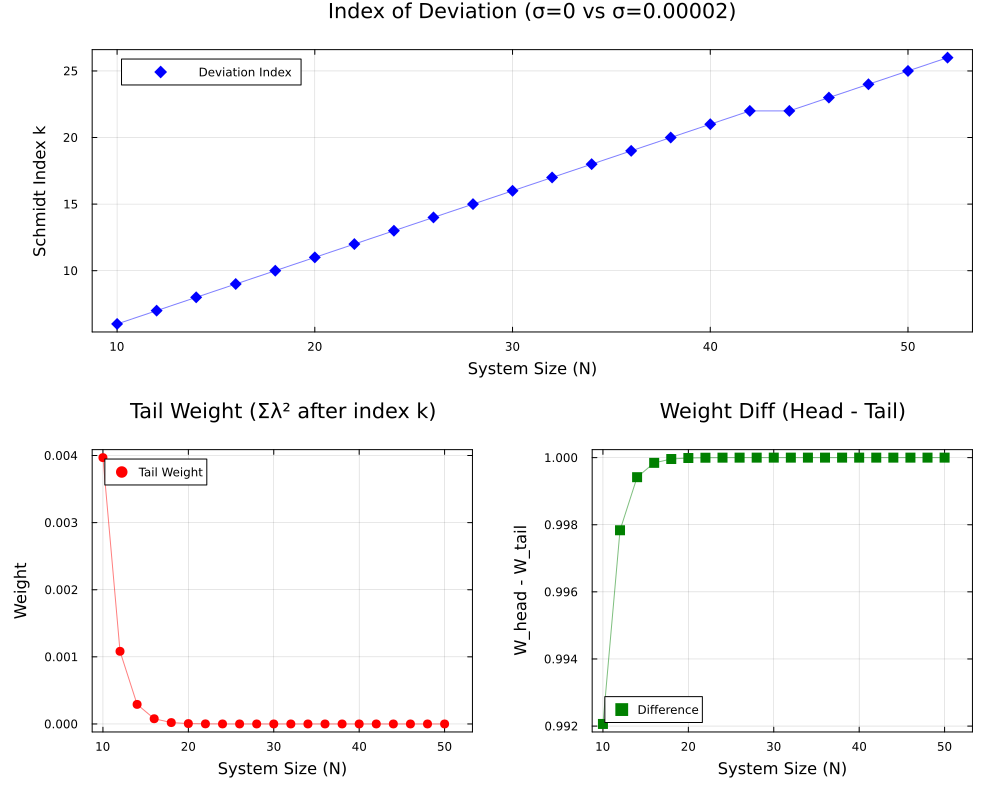

"c:\\Users\\Ethan\\OneDrive - University of Bristol\\Labs\\Y4 Labs\\A_Ethan_code\\A_EPS_tail\\deviation_index_0.00002.png"

In [77]:
p_analysis = plot_analysis_results(dev_indices_00002, tail_w_00002, w_diffs_00002, "0.00002")
display(p_analysis)
savefig(p_analysis, joinpath(@__DIR__,"deviation_index_0.00002.png"))


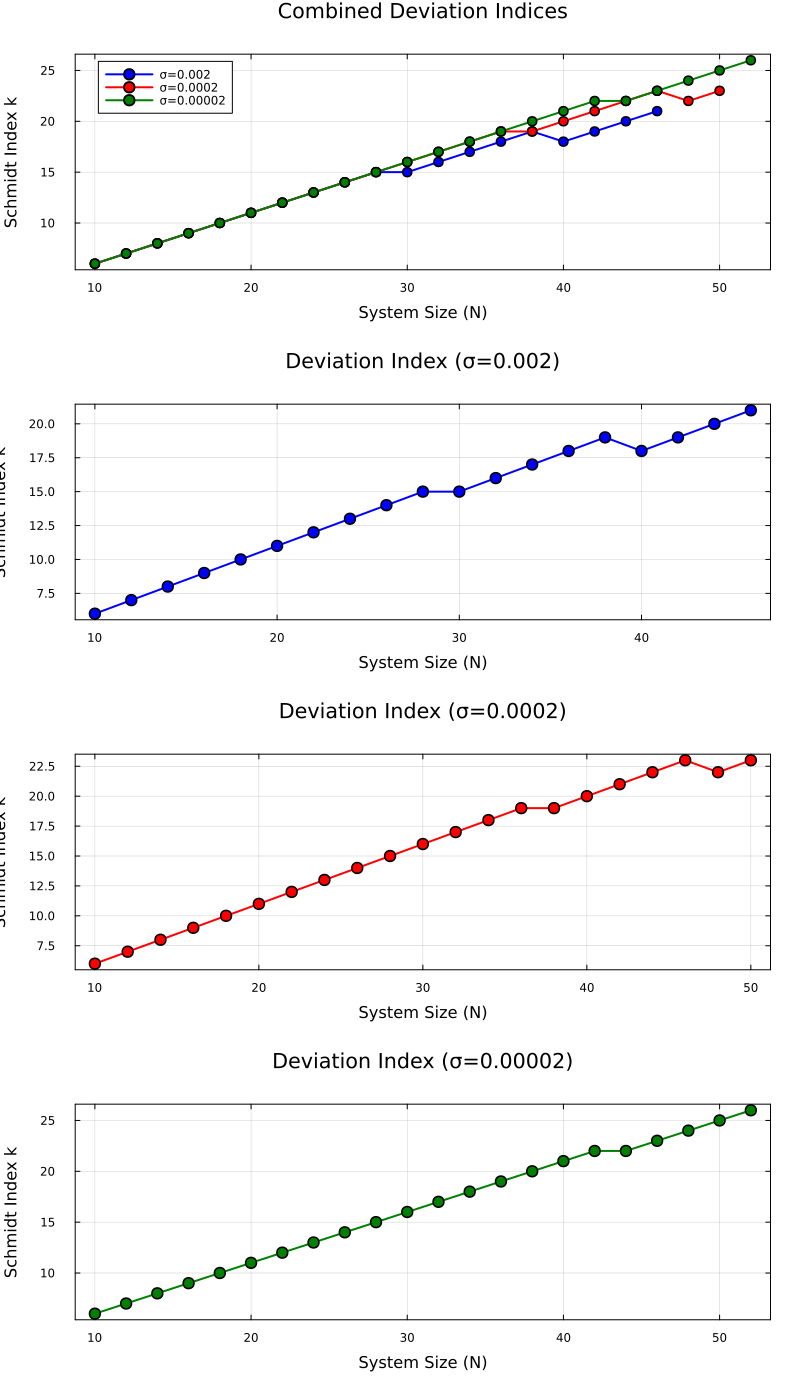

"c:\\Users\\Ethan\\OneDrive - University of Bristol\\Labs\\Y4 Labs\\A_Ethan_code\\A_EPS_tail\\deviation_index_plots.png"

In [85]:
"""
Plots the deviation indices for 3 different sigmas.
P1: Combined plot.
P2-P4: Individual plots.
"""
function deviation_index_plots(ind_002::Dict, ind_0002::Dict, ind_00002::Dict)
    
    function extract_sorted(d)
        Ns = sort(collect(keys(d)))
        vals = [d[N] for N in Ns]
        return Ns, vals
    end

    N_1, I_1 = extract_sorted(ind_002)
    N_2, I_2 = extract_sorted(ind_0002)
    N_3, I_3 = extract_sorted(ind_00002)

    p1 = plot(
        title = "Combined Deviation Indices",
        xlabel = "System Size (N)",
        ylabel = "Schmidt Index k",
        framestyle = :box,
        grid = true,
        legend = :topleft
    )
    plot!(p1, N_1, I_1, label="σ=0.002", color=:blue, marker=:circle, markersize=5, lw=2)
    plot!(p1, N_2, I_2, label="σ=0.0002", color=:red, marker=:circle, markersize=5, lw=2)
    plot!(p1, N_3, I_3, label="σ=0.00002", color=:green, marker=:circle, markersize=5, lw=2)


    p2 = plot(N_1, I_1,
        title = "Deviation Index (σ=0.002)",
        xlabel = "System Size (N)",
        ylabel = "Schmidt Index k",
        label = "Index",
        color = :blue,
        marker = :circle,
        markersize = 6,
        lw = 2,
        grid = true,
        framestyle = :box,
        legend = false
    )

    p3 = plot(N_2, I_2,
        title = "Deviation Index (σ=0.0002)",
        xlabel = "System Size (N)",
        ylabel = "Schmidt Index k",
        label = "Index",
        color = :red,
        marker = :circle,
        markersize = 6,
        lw = 2,
        grid = true,
        framestyle = :box,
        legend = false
    )

    p4 = plot(N_3, I_3,
        title = "Deviation Index (σ=0.00002)",
        xlabel = "System Size (N)",
        ylabel = "Schmidt Index k",
        label = "Index",
        color = :green,
        marker = :circle,
        markersize = 6,
        lw = 2,
        grid = true,
        framestyle = :box,
        legend = false
    )


    l = @layout [a; b; c; d]
    
    p_final = plot(p1, p2, p3, p4, layout=l, size=(800, 1400), margin=5Plots.mm)
    
    return p_final
end

p_analysis = deviation_index_plots(dev_indices_002, dev_indices_0002, dev_indices_00002)
display(p_analysis)
savefig(p_analysis, joinpath(@__DIR__,"deviation_index_plots.png"))



In [79]:
"""
Analyzes the 'Noise Floor' to determine an optimal truncation cutoff.
Compares clean (σ=0) and disordered spectra to find the value at which they diverge.

Returns:
- recommended_cutoff: A safe truncation value just above the noise floor.
- stats: A dictionary containing the noise floor values for each N.
"""
function determine_noise_cutoff(results_clean::Dict, results_noisy::Dict; 
                                deviation_threshold=0.1, safety_factor=0.5)
    
    noise_floors = Float64[]
    
    # Intersect keys to compare same system sizes
    common_Ns = intersect(keys(results_clean), keys(results_noisy))
    
    
    for N in common_Ns
        # Get sorted coefficients
        clean = sort(results_clean[N], rev=true)
        noisy = sort(results_noisy[N], rev=true)
        
        # We compare only up to the length of the clean spectrum
        min_dim = min(length(clean), length(noisy))
        
        divergence_value = 0.0
        found_divergence = false
        
        for i in 1:min_dim
            val_c = clean[i]
            val_d = noisy[i]
            
            # Avoid division by zero for machine precision numbers
            if val_c < 1e-15
                # If clean drops to zero but noisy doesn't, we found the floor
                divergence_value = val_d
                found_divergence = true
                break
            end
            
            # Calculate relative difference
            rel_diff = abs(val_c - val_d) / val_c
            
            if rel_diff > deviation_threshold
                divergence_value = val_d
                found_divergence = true
                break
            end
        end
        
        # If no obvious divergence found in the head, the noise floor is likely 
        # determined by the tail of the clean system's cutoff
        if !found_divergence
            divergence_value = noisy[min_dim]
        end
        
        push!(noise_floors, divergence_value)
    end
    
    # We want a conservative cutoff that covers the worst case (highest noise floor)
    max_noise_floor = maximum(noise_floors)
    
    # Apply a safety factor (e.g., 2x the noise floor)
    recommended_cutoff = max_noise_floor * safety_factor
    
    return recommended_cutoff, max_noise_floor
end

rec_cutoff_002, floor_val_002 = determine_noise_cutoff(results_00, results_002)
rec_cutoff_0002, floor_val_0002 = determine_noise_cutoff(results_00, results_0002)
rec_cutoff_00002, floor_val_00002 = determine_noise_cutoff(results_00, results_00002)



(0.03149711190272536, 0.06299422380545072)

In [80]:


println("Detected Max Noise Floor (Schmidt Value):")
println("Sigma = $(0.002), floor =  $(floor_val_002)")
println("Sigma = $(0.0002), floor =   $(floor_val_0002)")
println("Sigma = $(0.00002), floor =   $(floor_val_00002)")

println("Recommended DMRG Cutoff (Safety Factor 2.0):")
println("Sigma = $(0.002), cutoff = $(rec_cutoff_002)")
println("Sigma = $(0.0002), cutoff =  $(rec_cutoff_0002)")
println("Sigma = $(0.00002), cutoff =  $(rec_cutoff_00002)")

Detected Max Noise Floor (Schmidt Value):
Sigma = 0.002, floor =  0.06299580793007714
Sigma = 0.0002, floor =   0.06299552839030001
Sigma = 2.0e-5, floor =   0.06299422380545072
Recommended DMRG Cutoff (Safety Factor 2.0):
Sigma = 0.002, cutoff = 0.03149790396503857
Sigma = 0.0002, cutoff =  0.031497764195150005
Sigma = 2.0e-5, cutoff =  0.03149711190272536


In [81]:
"""
Verification: Calculates the 'Lost Probability' if we apply the recommended cutoff.
If this value is very small (e.g. < 1e-4), the truncation is safe.
"""
function verify_truncation_safety(results_noisy::Dict, cutoff_value)
    println("Verifying safety for Cutoff = $cutoff_value")
    println("N  | Kept States | Lost Weight (Err)")
    println("---|-------------|------------------")
    
    for N in sort(collect(keys(results_noisy)))
        coeffs = sort(results_noisy[N], rev=true)
        
        # Keep only coefficients > cutoff
        kept_coeffs = filter(c -> c > cutoff_value, coeffs)
        
        # The bond dimension we WOULD use
        chi_new = length(kept_coeffs)
        
        # The sum of squares of discarded coefficients (Truncation Error)
        discarded_coeffs = filter(c -> c <= cutoff_value, coeffs)
        lost_weight = sum(discarded_coeffs .^ 2)
        
        @printf "%-3d| %-11d | %.2e\n" N chi_new lost_weight
    end
end

verify_truncation_safety(results_002, rec_cutoff_002)
verify_truncation_safety(results_0002, rec_cutoff_0002)
verify_truncation_safety(results_00002, rec_cutoff_00002)

Verifying safety for Cutoff = 0.03149790396503857
N  | Kept States | Lost Weight (Err)
---|-------------|------------------
10 | 6           | 2.18e-07
12 | 7           | 2.36e-07
14 | 6           | 5.83e-04
16 | 7           | 1.56e-04
18 | 8           | 4.13e-05
20 | 7           | 1.09e-03
22 | 8           | 3.46e-04
24 | 9           | 1.08e-04
26 | 8           | 1.20e-03
28 | 9           | 4.23e-04
30 | 10          | 1.45e-04
32 | 9           | 1.09e-03
34 | 10          | 4.13e-04
36 | 11          | 1.52e-04
38 | 10          | 9.05e-04
40 | 11          | 3.60e-04
42 | 10          | 1.68e-03
44 | 11          | 7.13e-04
46 | 12          | 2.95e-04
Verifying safety for Cutoff = 0.031497764195150005
N  | Kept States | Lost Weight (Err)
---|-------------|------------------
10 | 6           | 1.77e-09
12 | 7           | 2.47e-09
14 | 6           | 5.83e-04
16 | 7           | 1.55e-04
18 | 8           | 4.11e-05
20 | 7           | 1.09e-03
22 | 8           | 3.46e-04
24 | 9           | 1.07

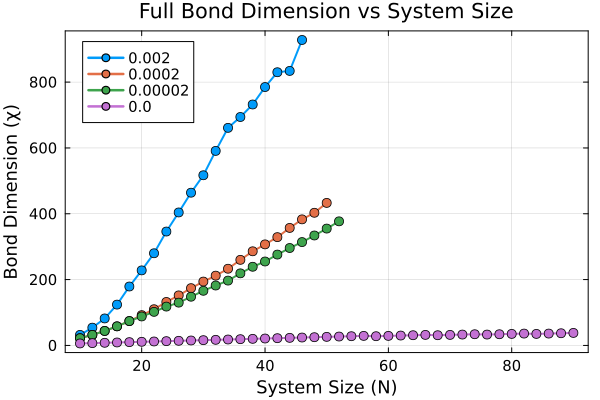

"c:\\Users\\Ethan\\OneDrive - University of Bristol\\Labs\\Y4 Labs\\A_Ethan_code\\A_EPS_tail\\bond_dimension_0.002.png"

In [82]:
"""
Plots the total bond dimension (number of all Schmidt coefficients) vs System Size (N) 
for multiple datasets on the same graph. No cutoff is applied.
"""
function plot_full_bond_dimensions(datasets::Vector{Tuple{String, Dict{Int64, Vector{Float64}}}})
    p = plot(
        title = "Full Bond Dimension vs System Size",
        xlabel = "System Size (N)",
        ylabel = "Bond Dimension (χ)",
        legend = :topleft,
        grid = :true,
        guidefontsize = 12,
        tickfontsize = 10,
        legendfontsize = 10,
        framestyle = :box,
        markerstrokewidth = 0
    )

    for (label_name, results_dict) in datasets
        Ns = sort(collect(keys(results_dict)))
        
        chis = Int[]
        for N in Ns
            coeffs = results_dict[N]
            push!(chis, length(coeffs))
        end

        plot!(p, Ns, chis, 
              label = label_name, 
              marker = :circle, 
              linewidth = 2,
              markersize = 5)
    end

    return p

end




p_bonddim = plot_full_bond_dimensions(all_datasets)
display(p_bonddim)
savefig(p_bonddim, joinpath(@__DIR__,"bond_dimension_0.002.png"))


In [83]:
# """
# Plots the bond dimension vs System Size (N) for multiple datasets.
# Arguments:
#   - datasets: Vector of (Label, DataDict) tuples.
#   - cutoffs: Dictionary mapping 'Label' -> 'Cutoff Value'. 
# """
# function plot_all_bond_dimensions(
#     datasets::Vector{Tuple{String, Dict{Int64, Vector{Float64}}}}, 
#     cutoffs::Dict{String, Float64}
# )
#     p = plot(
#         title = "Bond Dimension Scaling (Truncated)",
#         xlabel = "System Size (N)",
#         ylabel = "Bond Dimension (χ)",
#         legend = :topleft,
#         grid = :true,
#         guidefontsize = 12,
#         tickfontsize = 10,
#         legendfontsize = 10,
#         framestyle = :box
#     )


#     for (i, (label_name, results_dict)) in enumerate(datasets)
        
#         if haskey(cutoffs, label_name)
#             cutoff_val = cutoffs[label_name]
            
#             Ns = sort(collect(keys(results_dict)))
            
#             chis = Int[]
#             for N in Ns
#                 coeffs = results_dict[N]
#                 chi = count(c -> c > cutoff_val, coeffs)
#                 push!(chis, chi)
#             end

#             plot_label = "$label_name (ϵ=$(@sprintf "%.1e" cutoff_val))"
            
#             plot!(p, Ns, chis, 
#                   label = plot_label, 
#                   linewidth = 2,
#                   markersize = 5)
#         end
#     end
#     return p
    
# end


# all_cutoffs= Dict(
#     "0.002"   => rec_cutoff_002,
#     "0.0002"  => rec_cutoff_0002,
#     "0.00002" => rec_cutoff_00002
#     )

# p_bonddim = plot_all_bond_dimensions(all_datasets, all_cutoffs)
# display(p_bonddim)
# savefig(p_bonddim, joinpath(@__DIR__,"bond_dimension_tuncated.png"))
